In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
import j_process
import j_clustertuner

In [2]:
df = pd.read_parquet("filtered.parquet")

In [3]:
df.head()

,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNC1,CHCOCNC1,CHCCOPD3,CHCKDNY2,HAVARTH4,DIABETE4,EDUCA,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,ECIGNOW2,FLUSHOT7,PNEUVAC4,SEATBELT,COVIDPO1,GENHLTH,EXERANY2,TOLDHI3
0,No,No,No,No - Go to Section 07.06 CHCSCNC1,No,No,No,No,No,Yes,College 1 year to 3 years (Some college or tec...,No,No,No,Yes,No,No,No - Go to Section 12.03 USENOW3,Never used e-cigarettes in your entire life,No - Go to Section 13.03 PNEUVAC4,No,Always,No - Go to Modules or Closing Statement,Very good,No - Go to Section 04.08 STRENGTH,No
1,No,No,No,No - Go to Section 07.06 CHCSCNC1,No,No,No,No,Yes,No - Go to Section 08.01 AGE,College 1 year to 3 years (Some college or tec...,Yes,No,No,No,No,No,No - Go to Section 12.03 USENOW3,Never used e-cigarettes in your entire life,Yes,Yes,Always,No - Go to Modules or Closing Statement,Very good,Yes,Yes
2,No,No,No,Yes,No,No,No,No,Yes,No - Go to Section 08.01 AGE,Grade 12 or GED (High school graduate),Don't know/Not Sure,Yes,Yes,Yes,No,No,Yes,Never used e-cigarettes in your entire life,Yes,Yes,Always,No - Go to Modules or Closing Statement,Fair,Yes,Yes
3,No,No,No,No - Go to Section 07.06 CHCSCNC1,Yes,Yes,No,No,Yes,No - Go to Section 08.01 AGE,College 1 year to 3 years (Some college or tec...,No,No,No,Yes,No,No,No - Go to Section 12.03 USENOW3,Never used e-cigarettes in your entire life,Yes,Yes,Always,No - Go to Modules or Closing Statement,Very good,Yes,No
4,No,No,No,No - Go to Section 07.06 CHCSCNC1,No,Yes,No,No,Yes,Yes,College 1 year to 3 years (Some college or tec...,No,No,Yes,Yes,No,Yes,No - Go to Section 12.03 USENOW3,Never used e-cigarettes in your entire life,No - Go to Section 13.03 PNEUVAC4,Yes,Always,No - Go to Modules or Closing Statement,Fair,Yes,No


In [4]:
#Just a function to help me visualize each feature

def i_graph(colname):
    ig_counts = df[colname].value_counts(dropna=False)
    
    print("Value counts for", colname)
    print(ig_counts)
    


In [5]:
def rep_graph(colname,stringstorepl):
    df[colname] = df[colname].replace(stringstorepl,np.nan)
    rg_counts = df[colname].value_counts(dropna=False)

# Plot
    rg_ax = rg_counts.plot(kind='bar')
    plt.title('Counts per Category')
    plt.xlabel('Category')
    plt.ylabel('Count')


    for i, v in enumerate(rg_counts):
        rg_ax.text(i, v + max(rg_counts) * 0.01, str(v), ha='center', va='bottom')

    plt.tight_layout()
    rg_title = colname
    rg_filename = rg_title.replace(" ", "_").replace("/", "-") + ".jpg"
    plt.savefig(rg_filename, format='jpg', dpi=300)
    plt.show()



In [6]:
i_graph("CVDINFR4")


Value counts for CVDINFR4
CVDINFR4
No                     407304
Yes                     23451
Don't know/Not sure      2314
Refused                   251
Missing                     3
Name: count, dtype: int64


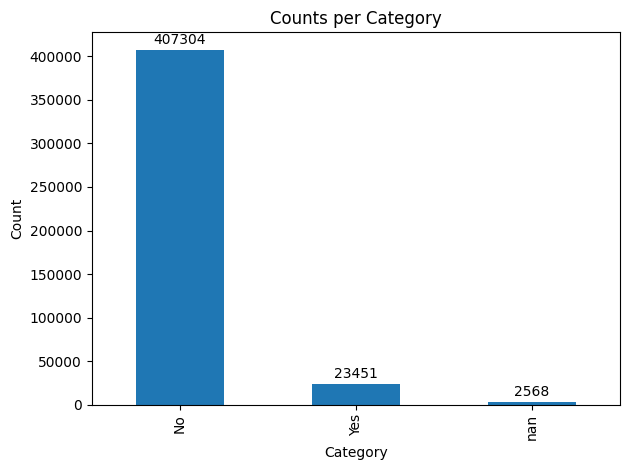

In [7]:
rep_graph("CVDINFR4",["Don't know/Not sure","Refused","Missing"])


In [8]:
i_graph("CVDCRHD4")


Value counts for CVDCRHD4
CVDCRHD4
No                     405638
Yes                     23454
Don't know/Not sure      3936
Refused                   292
Missing                     3
Name: count, dtype: int64


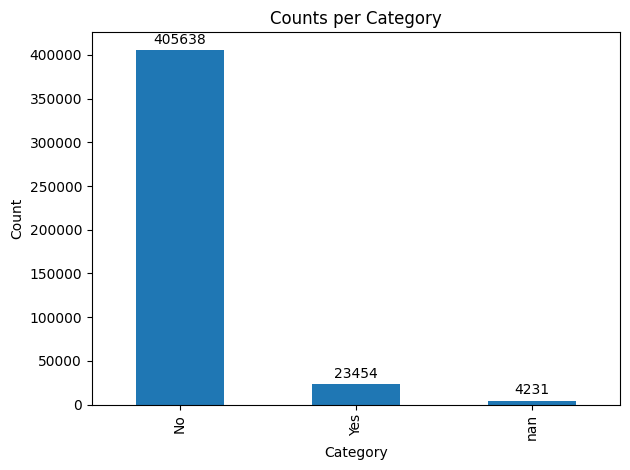

In [9]:
rep_graph("CVDCRHD4",["Don't know/Not sure","Refused","Missing"])

In [10]:
i_graph("CVDSTRK3")
default = ["Don't know/Not sure","Refused","Missing","Don't know / Not sure","Don't know/Not Sure"]

Value counts for CVDSTRK3
CVDSTRK3
No                     413499
Yes                     18350
Don't know/Not sure      1212
Refused                   258
Missing                     4
Name: count, dtype: int64


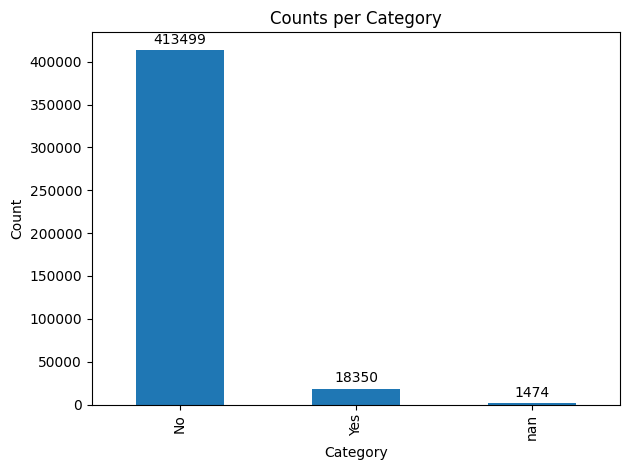

In [11]:
rep_graph("CVDSTRK3",default)

In [12]:
i_graph("ASTHMA3")

Value counts for ASTHMA3
ASTHMA3
No -  Go to Section 07.06 CHCSCNC1                     367256
Yes                                                     64366
Don't know/Not Sure -  Go to Section 07.06 CHCSCNC1      1444
Refused -  Go to Section 07.06 CHCSCNC1                   254
Missing                                                     3
Name: count, dtype: int64


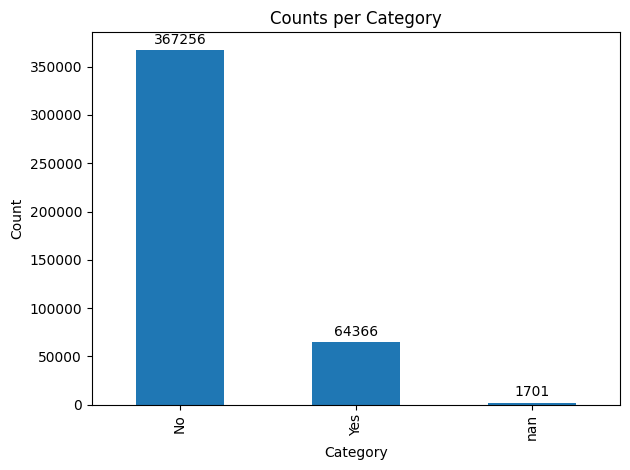

In [13]:
df["ASTHMA3"]=df["ASTHMA3"].replace(["No -  Go to Section 07.06 CHCSCNC1"],"No")
rep_graph("ASTHMA3",["Don't know/Not Sure -  Go to Section 07.06 CHCSCNC1","Refused -  Go to Section 07.06 CHCSCNC1","Missing"])


In [14]:
i_graph("CHCSCNC1")


Value counts for CHCSCNC1
CHCSCNC1
No                       393826
Yes                       36567
Don't know / Not sure      2634
Refused                     293
Missing                       3
Name: count, dtype: int64


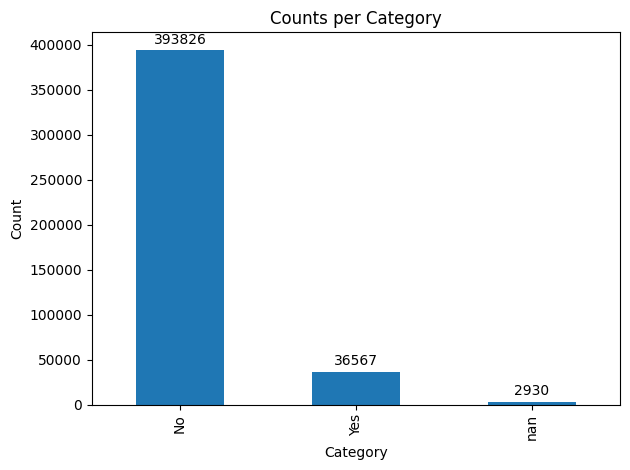

In [15]:
rep_graph("CHCSCNC1",default)

In [16]:
i_graph("CHCOCNC1")

Value counts for CHCOCNC1
CHCOCNC1
No                       380431
Yes                       50555
Don't know / Not sure      1989
Refused                     345
Missing                       3
Name: count, dtype: int64


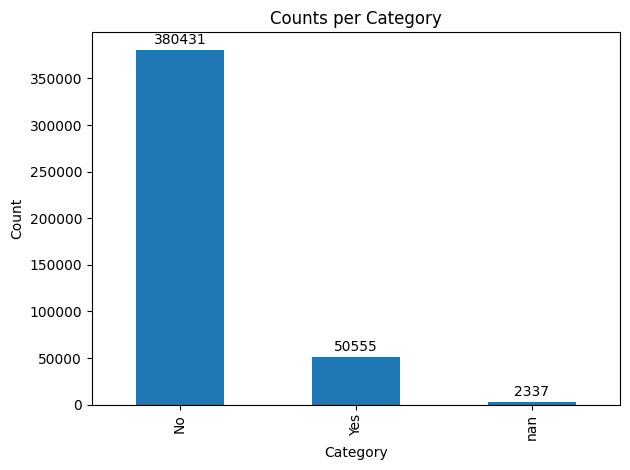

In [17]:
rep_graph("CHCOCNC1",default)

Value counts for CHCCOPD3
CHCCOPD3
No                       398160
Yes                       33097
Don't know / Not sure      1794
Refused                     269
Missing                       3
Name: count, dtype: int64


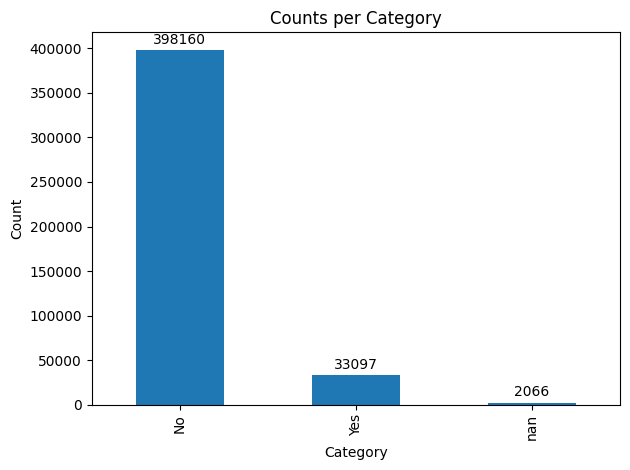

In [18]:
i_graph("CHCCOPD3")
rep_graph("CHCCOPD3",default)

Value counts for CHCKDNY2
CHCKDNY2
No                       410876
Yes                       20555
Don't know / Not sure      1622
Refused                     267
Missing                       3
Name: count, dtype: int64


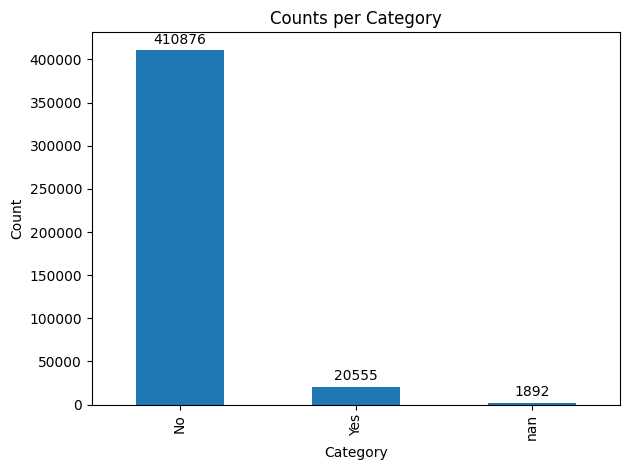

In [19]:
i_graph("CHCKDNY2")
rep_graph("CHCKDNY2",default)

Value counts for HAVARTH4
HAVARTH4
No                     287999
Yes                    142764
Don't know/Not Sure      2253
Refused                   303
Missing                     4
Name: count, dtype: int64


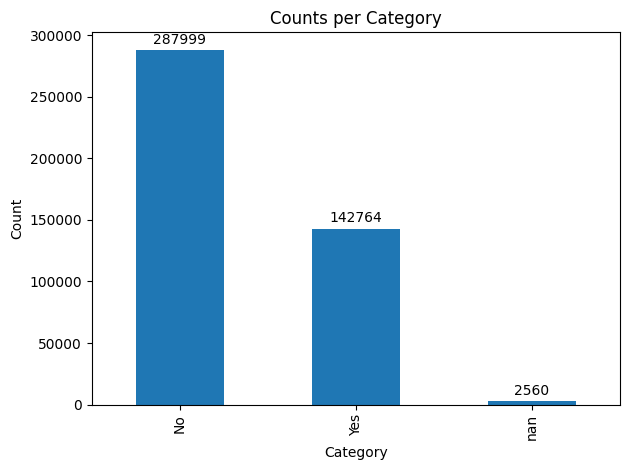

In [20]:
i_graph("HAVARTH4")
rep_graph("HAVARTH4",default)

Value counts for DIABETE4
DIABETE4
No                                                                       358706
Yes                                                                       59786
No, pre-diabetes or borderline diabetes -  Go to Section 08.01 AGE        10594
Yes, but female told only during pregnancy -  Go to Section 08.01 AGE      3253
Don't know/Not Sure -  Go to Section 08.01 AGE                              683
Refused -  Go to Section 08.01 AGE                                          296
Missing                                                                       5
Name: count, dtype: int64


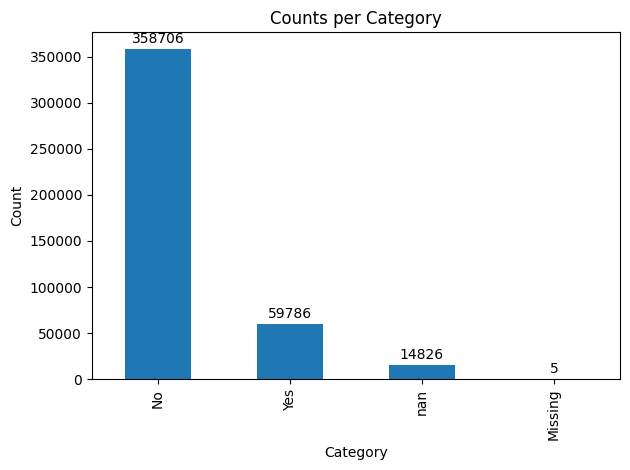

In [21]:
df["DIABETE4"]=df["DIABETE4"].replace(["No -  Go to Section 08.01 AGE"],"No")
i_graph("DIABETE4")
#rep_graph("DIABETE4",default)
rep_graph("DIABETE4",["No, pre-diabetes or borderline diabetes -  Go to Section 08.01 AGE","Yes, but female told only during pregnancy -  Go to Section 08.01 AGE","Don't know/Not Sure -  Go to Section 08.01 AGE","Refused -  Go to Section 08.01 AGE"])

Value counts for EDUCA
EDUCA
Bachelors degree or Higher    184867
Some College or Associates    114346
High School Graduate          106613
Some High School               16161
Elementary Only                 8324
Refused                         2316
None or Kindergarten Only        687
Missing                            9
Name: count, dtype: int64


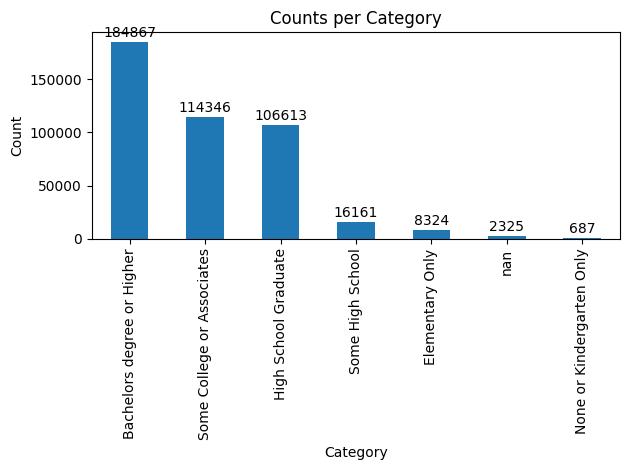

In [22]:
df["EDUCA"]=df["EDUCA"].replace(["College 4 years or more (College graduate)"],"Bachelors degree or Higher")
df["EDUCA"]=df["EDUCA"].replace(["College 1 year to 3 years (Some college or technical school)"],"Some College or Associates")
df["EDUCA"]=df["EDUCA"].replace(["Grade 12 or GED (High school graduate)"],"High School Graduate")
df["EDUCA"]=df["EDUCA"].replace(["Grades 9 through 11 (Some high school)"],"Some High School")
df["EDUCA"]=df["EDUCA"].replace(["Grades 1 through 8 (Elementary)"],"Elementary Only")
df["EDUCA"]=df["EDUCA"].replace(["Never attended school or only kindergarten"],"None or Kindergarten Only")

i_graph("EDUCA")
rep_graph("EDUCA",default)

Value counts for DEAF
DEAF
No                     379796
Yes                     38735
Missing                 13075
Don't know/Not Sure      1133
Refused                   584
Name: count, dtype: int64


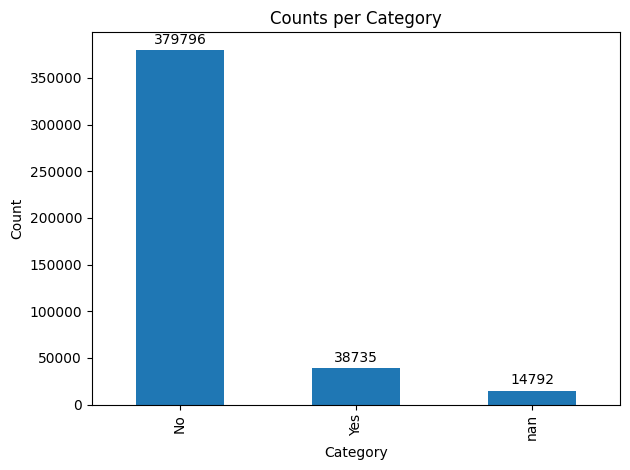

In [23]:
i_graph("DEAF")
rep_graph("DEAF",default)

Value counts for BLIND
BLIND
No                     395423
Yes                     22190
Missing                 14080
Don't know/Not Sure      1113
Refused                   517
Name: count, dtype: int64


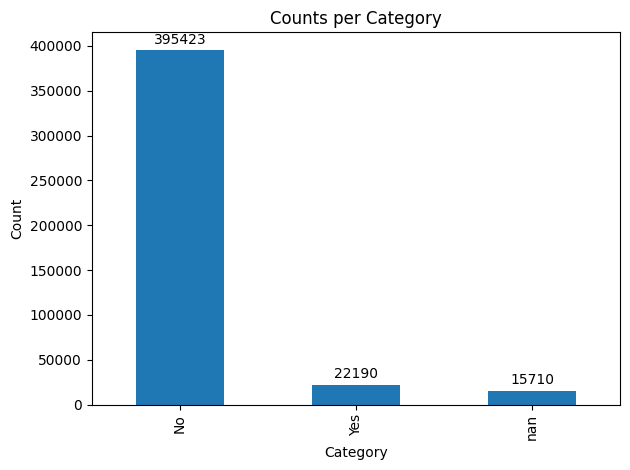

In [24]:
i_graph("BLIND")
rep_graph("BLIND",default)

Value counts for DECIDE
DECIDE
No                     365547
Yes                     49648
Missing                 15139
Don't know/Not Sure      2101
Refused                   888
Name: count, dtype: int64


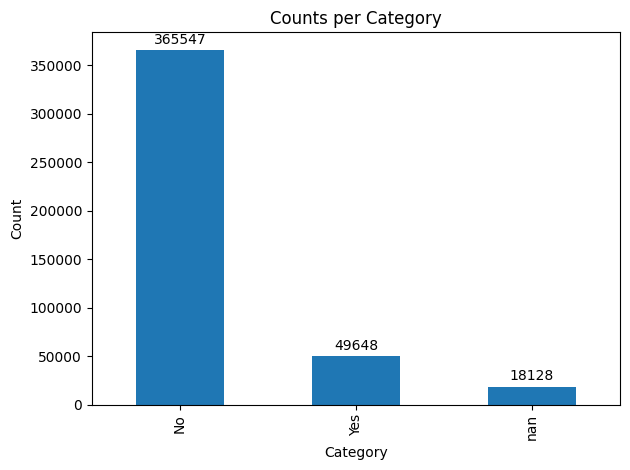

In [25]:
i_graph("DECIDE")
rep_graph("DECIDE",default)

Value counts for DIFFWALK
DIFFWALK
No                     348452
Yes                     67021
Missing                 16146
Don't know/Not Sure      1206
Refused                   498
Name: count, dtype: int64


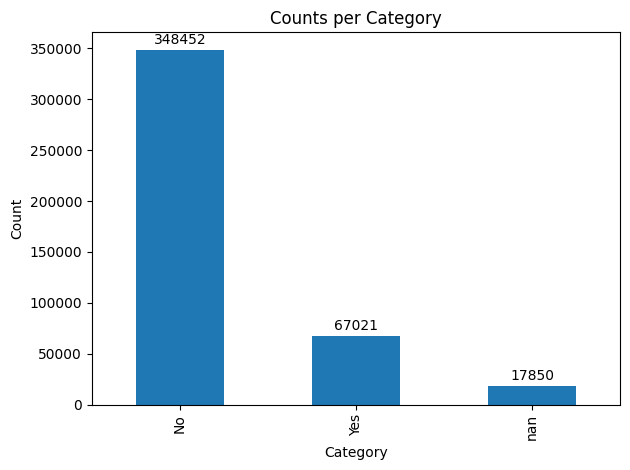

In [26]:
i_graph("DIFFWALK")
rep_graph("DIFFWALK",default)

Value counts for DIFFDRES
DIFFDRES
No                     399108
Missing                 16869
Yes                     16539
Don't know/Not Sure       424
Refused                   383
Name: count, dtype: int64


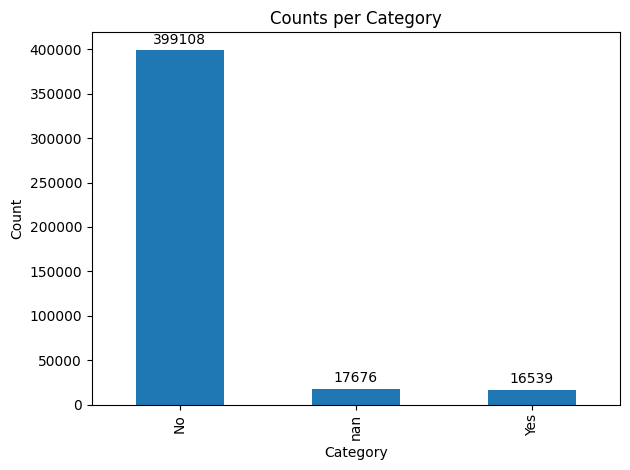

In [27]:
i_graph("DIFFDRES")
rep_graph("DIFFDRES",default)


Value counts for DIFFALON
DIFFALON
No                     381959
Yes                     31964
Missing                 17860
Don't know/Not Sure      1011
Refused                   529
Name: count, dtype: int64


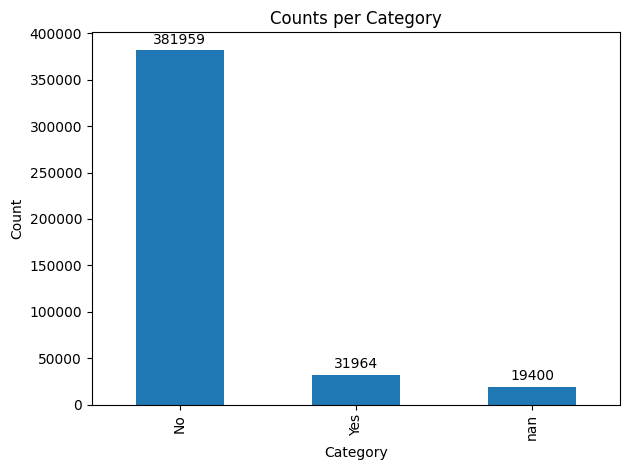

In [28]:
i_graph("DIFFALON")
rep_graph("DIFFALON",default)

Value counts for SMOKE100
SMOKE100
No                     251981
Yes                    158774
Missing                 19674
Don't know/Not Sure      2251
Refused                   643
Name: count, dtype: int64


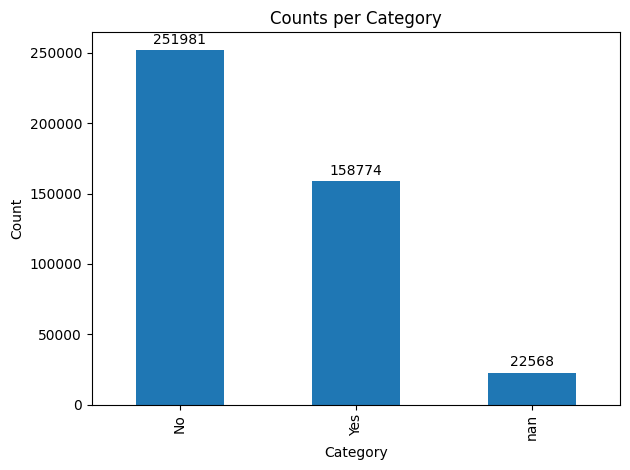

In [29]:

df["SMOKE100"]=df["SMOKE100"].replace(["No -  Go to Section 12.03 USENOW3"],"No")
df["SMOKE100"]=df["SMOKE100"].replace(["Don't know/Not Sure -  Go to Section 12.03 USENOW3"],"Don't know/Not Sure")
df["SMOKE100"]=df["SMOKE100"].replace(["Refused -  Go to Section 12.03 USENOW3"],"Refused")
i_graph("SMOKE100")
rep_graph("SMOKE100",default)


Value counts for ECIGNOW2
ECIGNOW2
Never                    318696
Not Currently             69110
Missing                   21467
Some Days                 11164
Every Day                 11102
Refused                     911
Don't know / Not sure       873
Name: count, dtype: int64


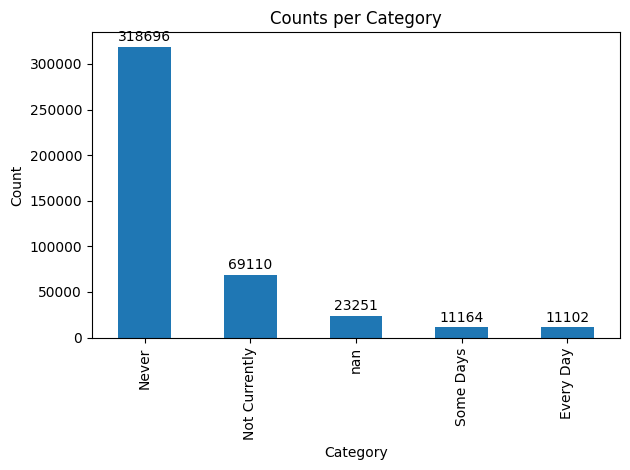

In [30]:
df["ECIGNOW2"]=df["ECIGNOW2"].replace(["Never used e-cigarettes in your entire life"],"Never")
df["ECIGNOW2"]=df["ECIGNOW2"].replace(["Not at all (right now)"],"Not Currently")
df["ECIGNOW2"]=df["ECIGNOW2"].replace(["Use them some days"],"Some Days")
df["ECIGNOW2"]=df["ECIGNOW2"].replace(["Use them every day"],"Every Day")
i_graph("ECIGNOW2")
rep_graph("ECIGNOW2",default)

Value counts for FLUSHOT7
FLUSHOT7
No                     204711
Yes                    197294
Missing                 27751
Don't know/Not sure      2796
Refused                   771
Name: count, dtype: int64


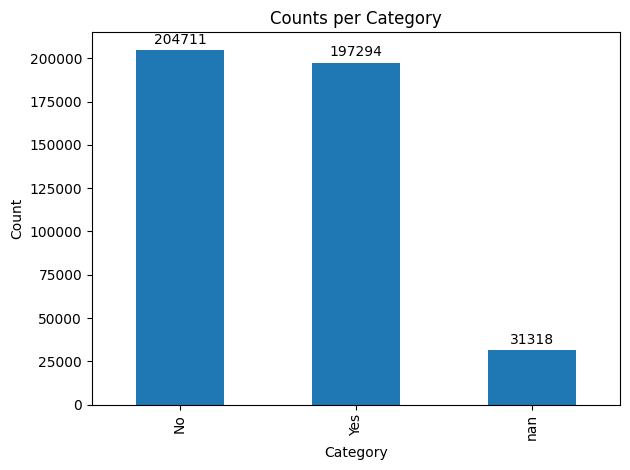

In [31]:
df["FLUSHOT7"]=df["FLUSHOT7"].replace(["No -  Go to Section 13.03 PNEUVAC4"],"No")
df["FLUSHOT7"]=df["FLUSHOT7"].replace(["Don't know/Not Sure -  Go to Section 13.03 PNEUVAC4"],"Don't know/Not sure")
df["FLUSHOT7"]=df["FLUSHOT7"].replace(["Refused -  Go to Section 13.03 PNEUVAC4"],"Refused")
i_graph("FLUSHOT7")
rep_graph("FLUSHOT7",default)

Value counts for PNEUVAC4
PNEUVAC4
No                     208403
Yes                    162037
Don't know/Not Sure     33390
Missing                 28750
Refused                   743
Name: count, dtype: int64


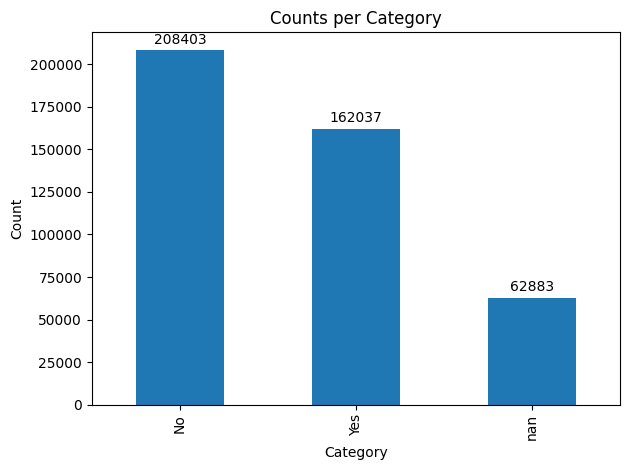

In [32]:
i_graph("PNEUVAC4")
rep_graph("PNEUVAC4",default)

Value counts for SEATBELT
SEATBELT
Always                 350207
Missing                 30778
Nearly always           28281
Sometimes               10885
Never                    7263
Seldom                   4309
Refused                  1238
Don't know/Not sure       362
Name: count, dtype: int64


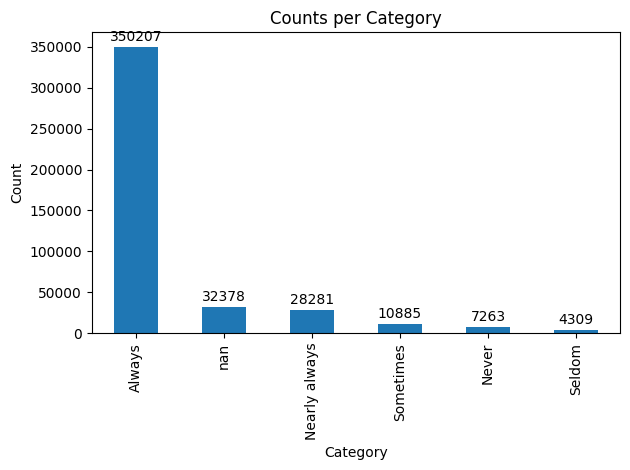

In [33]:
df["SEATBELT"]=df["SEATBELT"].replace(["Never drive or ride in a car -  Go to Section 16.1 COVIDPO1"],"Refused")
i_graph("SEATBELT")
rep_graph("SEATBELT",default)

Value counts for COVIDPO1
COVIDPO1
Yes                    201248
No                     197981
Missing                 32015
Refused                  1047
Don't know/Not sure      1032
Name: count, dtype: int64


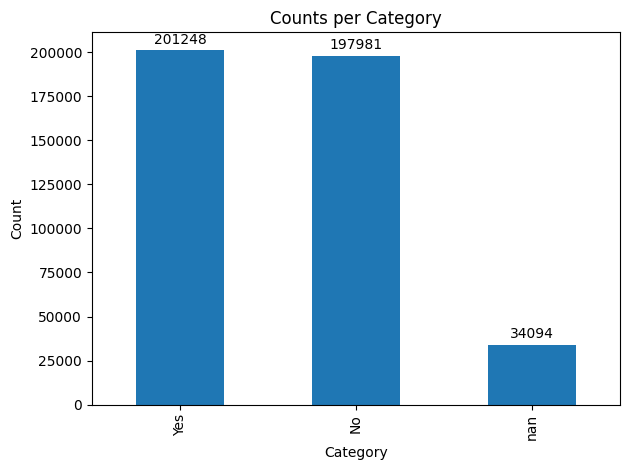

In [34]:
df["COVIDPO1"]=df["COVIDPO1"].replace(["No -  Go to Modules or Closing Statement"],"No")
df["COVIDPO1"]=df["COVIDPO1"].replace(["Refused -  Go to Modules or Closing Statement"],"Refused")
df["COVIDPO1"]=df["COVIDPO1"].replace(["Don't know/Not Sure -  Go to Modules or Closing Statement"],"Don't know/Not sure")
i_graph("COVIDPO1")
rep_graph("COVIDPO1",default)

Value counts for GENHLTH
GENHLTH
Good                   144209
Very good              142115
Excellent               63410
Fair                    61955
Poor                    20372
Don't know/Not Sure       897
Refused                   361
Missing                     4
Name: count, dtype: int64


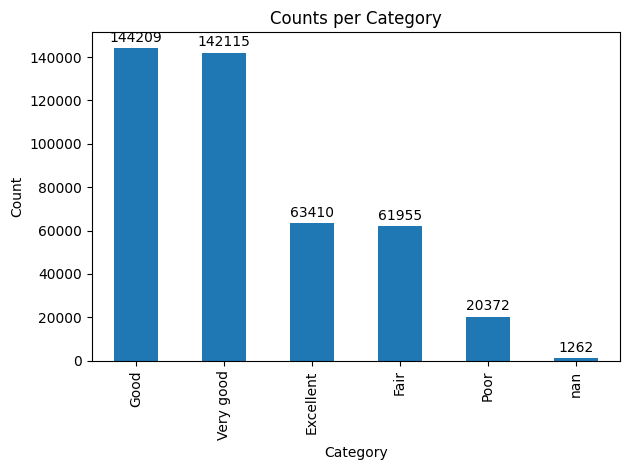

In [35]:
i_graph("GENHLTH")
rep_graph("GENHLTH",default)

Value counts for EXERANY2
EXERANY2
Yes                    325227
No                     106845
Don't know/Not sure       927
Refused                   322
Missing                     2
Name: count, dtype: int64


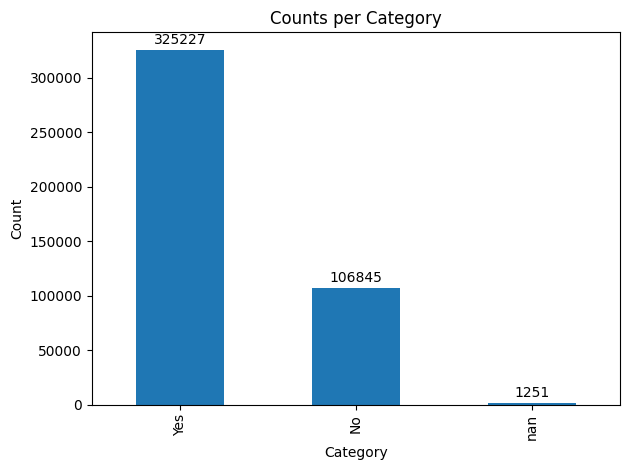

In [36]:
df["EXERANY2"]=df["EXERANY2"].replace(["No -  Go to Section 04.08 STRENGTH"],"No")
df["EXERANY2"]=df["EXERANY2"].replace(["Don't know/Not Sure -  Go to Section 04.08 STRENGTH"],"Don't know/Not sure")
df["EXERANY2"]=df["EXERANY2"].replace(["Refused -  Go to Section 04.08 STRENGTH"],"Refused")
i_graph("EXERANY2")
rep_graph("EXERANY2",default)

Value counts for TOLDHI3
TOLDHI3
No                     219333
Yes                    158906
Missing                 51812
Don't know/Not Sure      2868
Refused                   404
Name: count, dtype: int64


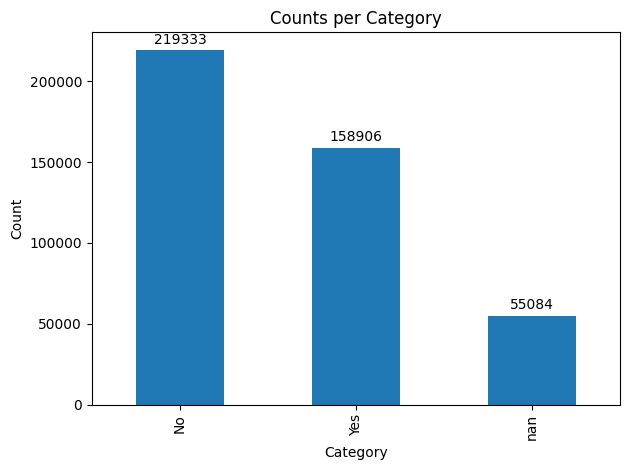

In [37]:
i_graph("TOLDHI3")
rep_graph("TOLDHI3",default)

In [38]:
df.head()

,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNC1,CHCOCNC1,CHCCOPD3,CHCKDNY2,HAVARTH4,DIABETE4,EDUCA,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,ECIGNOW2,FLUSHOT7,PNEUVAC4,SEATBELT,COVIDPO1,GENHLTH,EXERANY2,TOLDHI3
0,No,No,No,No,No,No,No,No,No,Yes,Some College or Associates,No,No,No,Yes,No,No,No,Never,No,No,Always,No,Very good,No,No
1,No,No,No,No,No,No,No,No,Yes,No,Some College or Associates,Yes,No,No,No,No,No,No,Never,Yes,Yes,Always,No,Very good,Yes,Yes
2,No,No,No,Yes,No,No,No,No,Yes,No,High School Graduate,NaN,Yes,Yes,Yes,No,No,Yes,Never,Yes,Yes,Always,No,Fair,Yes,Yes
3,No,No,No,No,Yes,Yes,No,No,Yes,No,Some College or Associates,No,No,No,Yes,No,No,No,Never,Yes,Yes,Always,No,Very good,Yes,No
4,No,No,No,No,No,Yes,No,No,Yes,Yes,Some College or Associates,No,No,Yes,Yes,No,Yes,No,Never,No,Yes,Always,No,Fair,Yes,No


In [39]:
print(df.isna().sum())
print(df.shape)
df.dropna(inplace=True)
print(df.shape)


CVDINFR4     2568
CVDCRHD4     4231
CVDSTRK3     1474
ASTHMA3      1701
CHCSCNC1     2930
CHCOCNC1     2337
CHCCOPD3     2066
CHCKDNY2     1892
HAVARTH4     2560
DIABETE4    14826
EDUCA        2325
DEAF        14792
BLIND       15710
DECIDE      18128
DIFFWALK    17850
DIFFDRES    17676
DIFFALON    19400
SMOKE100    22568
ECIGNOW2    23251
FLUSHOT7    31318
PNEUVAC4    62883
SEATBELT    32378
COVIDPO1    34094
GENHLTH      1262
EXERANY2     1251
TOLDHI3     55084
dtype: int64
(433323, 26)
(292773, 26)


In [40]:
columns_to_check = ['CVDINFR4', 'CVDCRHD4', 'CVDSTRK3','ASTHMA3','CHCSCNC1','CHCOCNC1','CHCCOPD3','CHCKDNY2','HAVARTH4','DIABETE4']
chronic_col = columns_to_check
df['ALL_CHRONIC'] = df[columns_to_check].eq('Yes').any(axis=1).map({True: 'Yes', False: 'No'})


In [41]:
df.head

<bound method NDFrame.head of        CVDINFR4 CVDCRHD4 CVDSTRK3 ASTHMA3 CHCSCNC1 CHCOCNC1 CHCCOPD3 CHCKDNY2  \
0            No       No       No      No       No       No       No       No   
1            No       No       No      No       No       No       No       No   
3            No       No       No      No      Yes      Yes       No       No   
4            No       No       No      No       No      Yes       No       No   
5            No       No       No      No       No       No       No       No   
...         ...      ...      ...     ...      ...      ...      ...      ...   
433313       No       No       No      No       No       No       No       No   
433314       No       No       No     Yes       No       No       No       No   
433319       No       No       No      No       No       No       No       No   
433320       No       No       No      No       No       No       No       No   
433321       No       No       No      No       No       No       No       No  

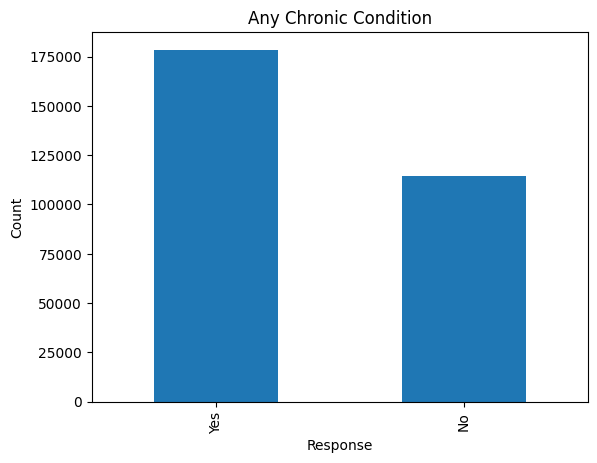

ALL_CHRONIC
Yes    0.609797
No     0.390203
Name: proportion, dtype: float64

In [42]:
df['ALL_CHRONIC'].value_counts(dropna=False)
df['ALL_CHRONIC'].value_counts().plot(kind='bar')
plt.title('Any Chronic Condition')
plt.xlabel('Response')
plt.ylabel('Count')
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()
df['ALL_CHRONIC'].value_counts(normalize=True, dropna=False)

In [43]:
columns_to_check = ['CVDINFR4', 'CVDCRHD4', 'CVDSTRK3']

df['ALL_CARDIAC'] = df[columns_to_check].eq('Yes').any(axis=1).map({True: 'Yes', False: 'No'})

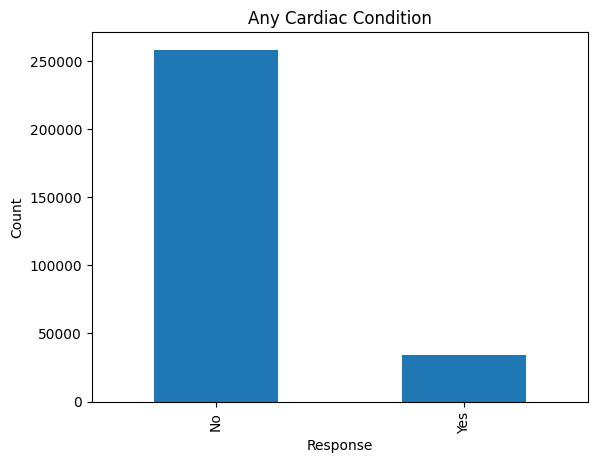

ALL_CARDIAC
No     0.882219
Yes    0.117781
Name: proportion, dtype: float64

In [44]:
df['ALL_CARDIAC'].value_counts(dropna=False)
df['ALL_CARDIAC'].value_counts().plot(kind='bar')
plt.title('Any Cardiac Condition')
plt.xlabel('Response')
plt.ylabel('Count')
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()
df['ALL_CARDIAC'].value_counts(normalize=True, dropna=False)

In [45]:
columns_to_check = ['CHCSCNC1','CHCOCNC1']

df['ALL_CANCER'] = df[columns_to_check].eq('Yes').any(axis=1).map({True: 'Yes', False: 'No'})

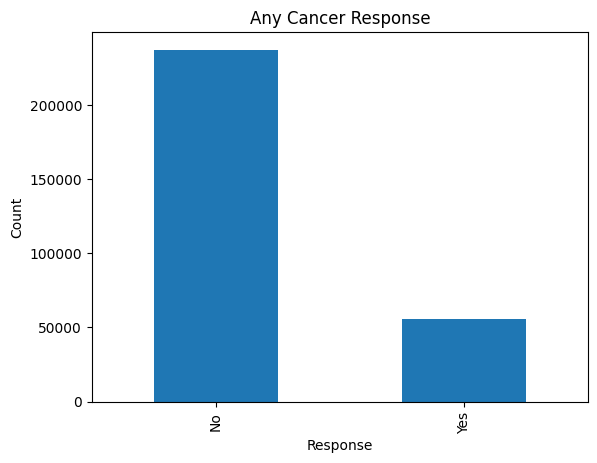

ALL_CANCER
No     0.809986
Yes    0.190014
Name: proportion, dtype: float64

In [46]:
df['ALL_CANCER'].value_counts(dropna=False)
df['ALL_CANCER'].value_counts().plot(kind='bar')
plt.title('Any Cancer Response')
plt.xlabel('Response')
plt.ylabel('Count')
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()
df['ALL_CANCER'].value_counts(normalize=True, dropna=False)

In [47]:
columns_to_check = ['ASTHMA3','CHCCOPD3']

df['ALL_PUL'] = df[columns_to_check].eq('Yes').any(axis=1).map({True: 'Yes', False: 'No'})

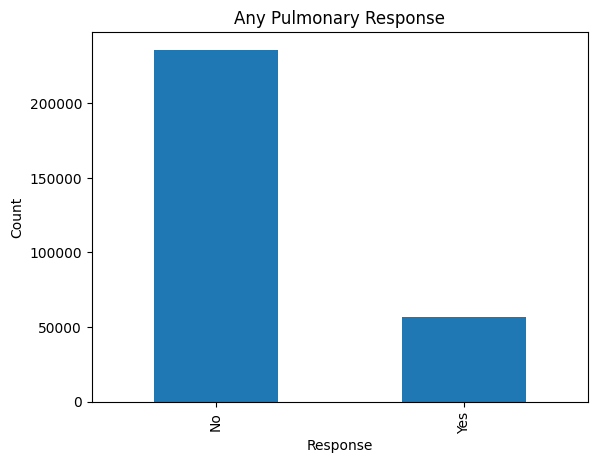

ALL_PUL
No     0.805812
Yes    0.194188
Name: proportion, dtype: float64

In [48]:
df['ALL_PUL'].value_counts(dropna=False)
df['ALL_PUL'].value_counts().plot(kind='bar')
plt.title('Any Pulmonary Response')
plt.xlabel('Response')
plt.ylabel('Count')
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()
df['ALL_PUL'].value_counts(normalize=True, dropna=False)

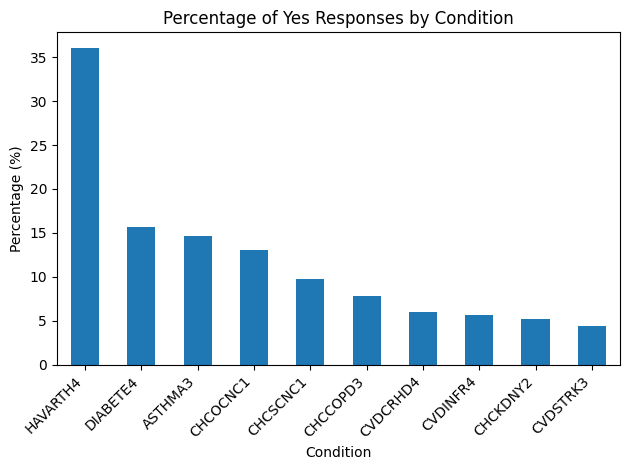

In [49]:


columns_to_check = [
    'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
    'ASTHMA3', 'CHCSCNC1', 'CHCOCNC1',
    'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4'
]
yes_rates = {
    col: (df[col] == "Yes").mean() * 100  
    for col in columns_to_check
}


yes_df = pd.Series(yes_rates).sort_values(ascending=False)

ax = yes_df.plot(kind='bar')
plt.title('Percentage of Yes Responses by Condition')
plt.ylabel('Percentage (%)')
plt.xlabel('Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
title = plt.gca().get_title()
filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
plt.savefig(filename, format='jpg', dpi=300)
plt.show()


In [50]:
column_list = df.columns.tolist()
print(column_list)
feature_list = [col for col in column_list if col not in chronic_col]
deriv_col = ['ALL_CHRONIC','ALL_CARDIAC','ALL_CANCER','ALL_PUL']

['CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'EDUCA', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'ECIGNOW2', 'FLUSHOT7', 'PNEUVAC4', 'SEATBELT', 'COVIDPO1', 'GENHLTH', 'EXERANY2', 'TOLDHI3', 'ALL_CHRONIC', 'ALL_CARDIAC', 'ALL_CANCER', 'ALL_PUL']


In [51]:
feature_list = [col for col in feature_list if col not in deriv_col]
print(feature_list)

['EDUCA', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'ECIGNOW2', 'FLUSHOT7', 'PNEUVAC4', 'SEATBELT', 'COVIDPO1', 'GENHLTH', 'EXERANY2', 'TOLDHI3']



Value counts for EDUCA:
EDUCA
Bachelors degree or Higher    134661
Some College or Associates     77986
High School Graduate           66431
Some High School                9033
Elementary Only                 4368
None or Kindergarten Only        294
Name: count, dtype: int64


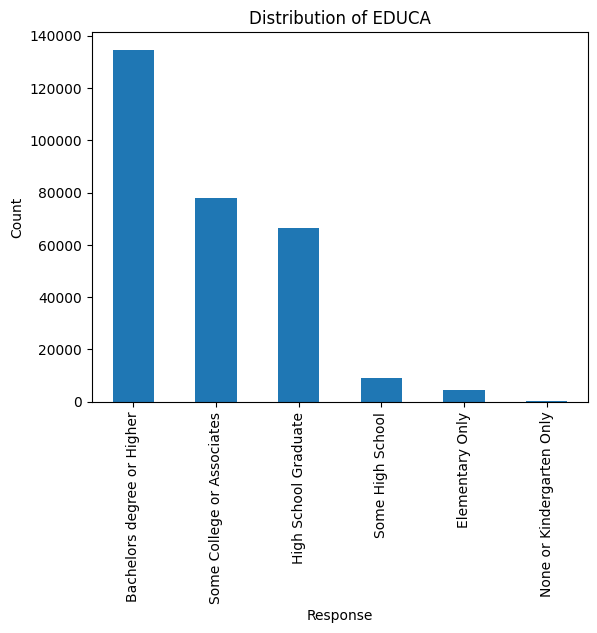


Value counts for DEAF:
DEAF
No     265699
Yes     27074
Name: count, dtype: int64


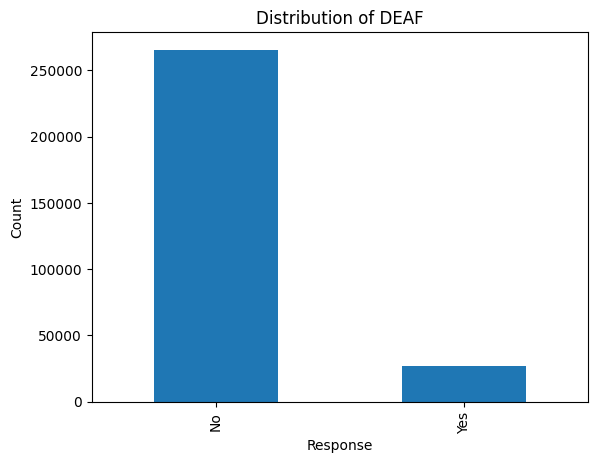


Value counts for BLIND:
BLIND
No     278366
Yes     14407
Name: count, dtype: int64


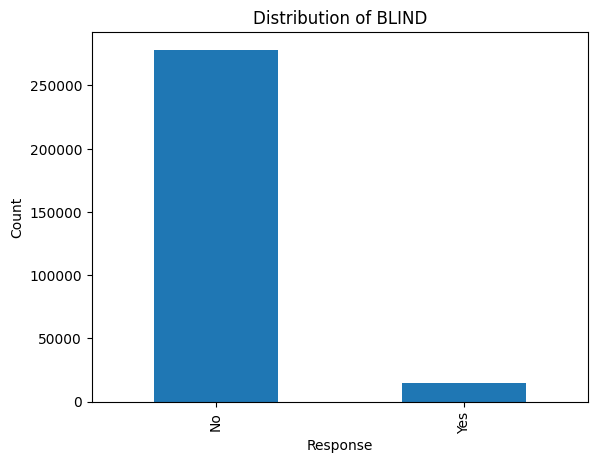


Value counts for DECIDE:
DECIDE
No     263172
Yes     29601
Name: count, dtype: int64


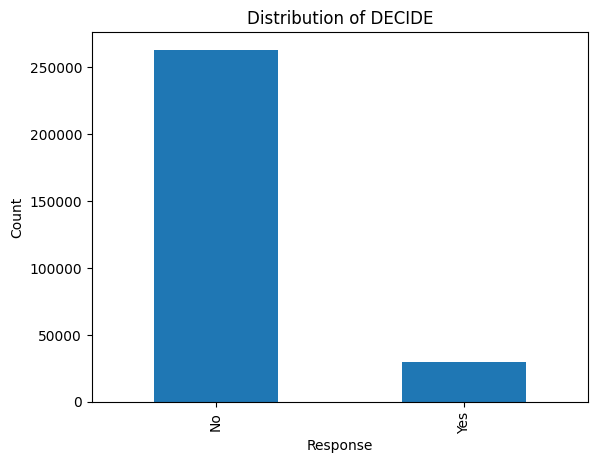


Value counts for DIFFWALK:
DIFFWALK
No     245793
Yes     46980
Name: count, dtype: int64


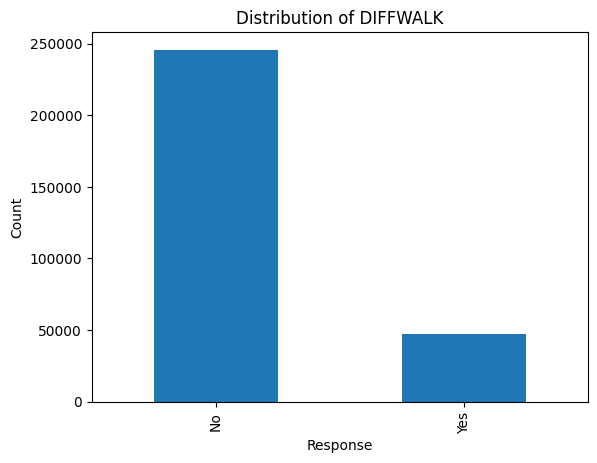


Value counts for DIFFDRES:
DIFFDRES
No     282083
Yes     10690
Name: count, dtype: int64


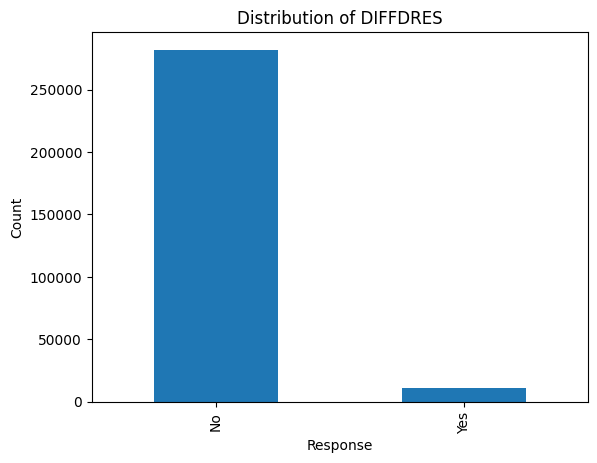


Value counts for DIFFALON:
DIFFALON
No     272651
Yes     20122
Name: count, dtype: int64


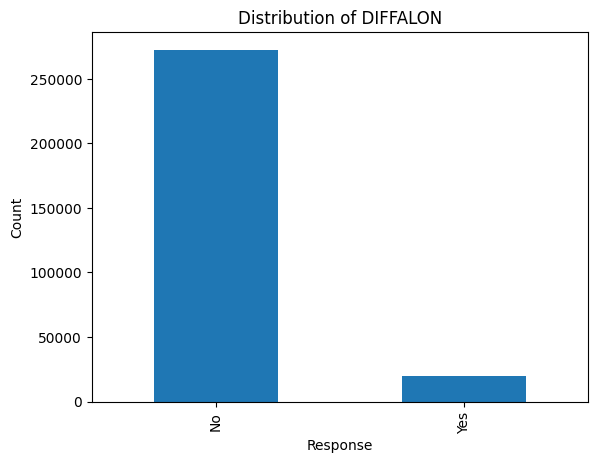


Value counts for SMOKE100:
SMOKE100
No     178357
Yes    114416
Name: count, dtype: int64


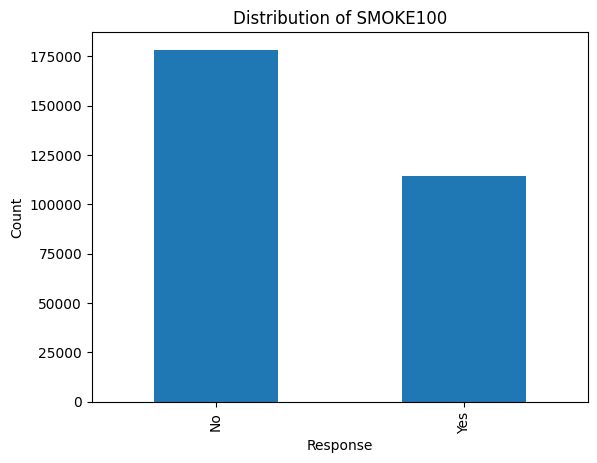


Value counts for ECIGNOW2:
ECIGNOW2
Never            235691
Not Currently     44771
Some Days          6372
Every Day          5939
Name: count, dtype: int64


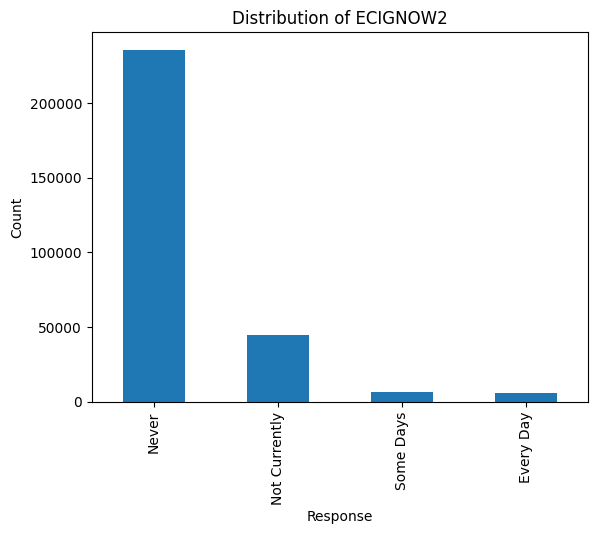


Value counts for FLUSHOT7:
FLUSHOT7
Yes    153135
No     139638
Name: count, dtype: int64


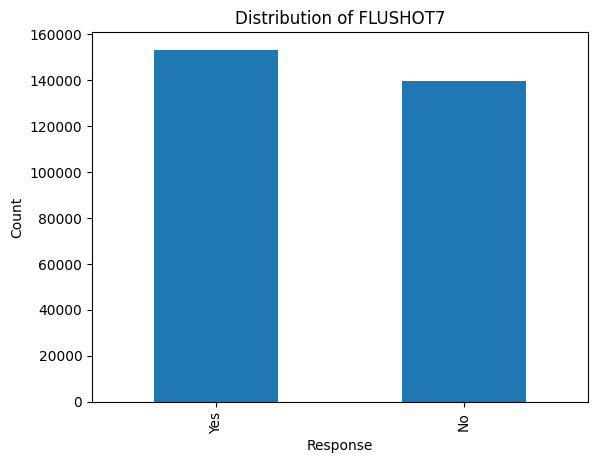


Value counts for PNEUVAC4:
PNEUVAC4
No     159816
Yes    132957
Name: count, dtype: int64


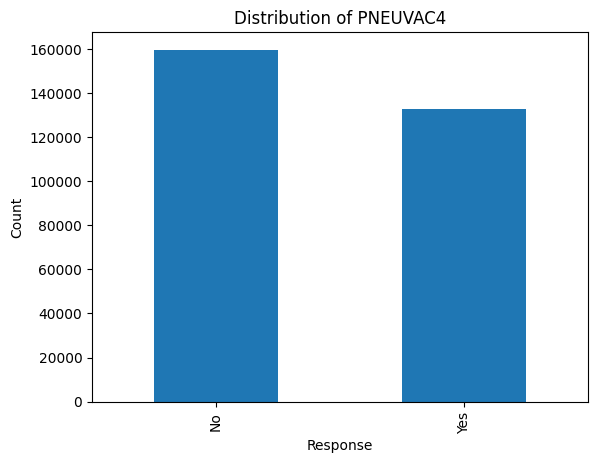


Value counts for SEATBELT:
SEATBELT
Always           259449
Nearly always     19013
Sometimes          6973
Never              4618
Seldom             2720
Name: count, dtype: int64


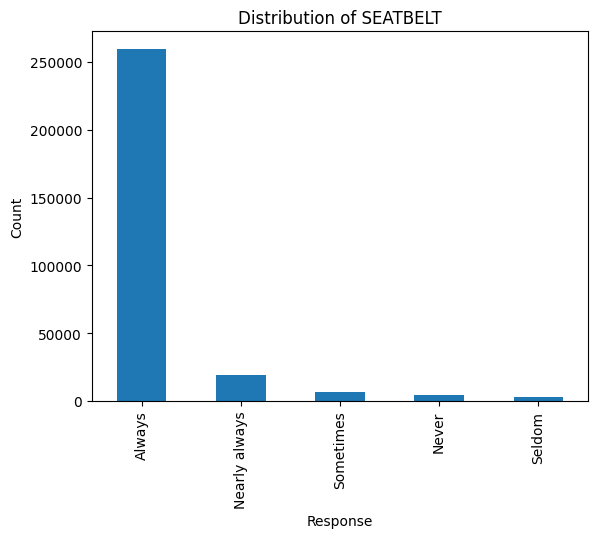


Value counts for COVIDPO1:
COVIDPO1
Yes    148942
No     143831
Name: count, dtype: int64


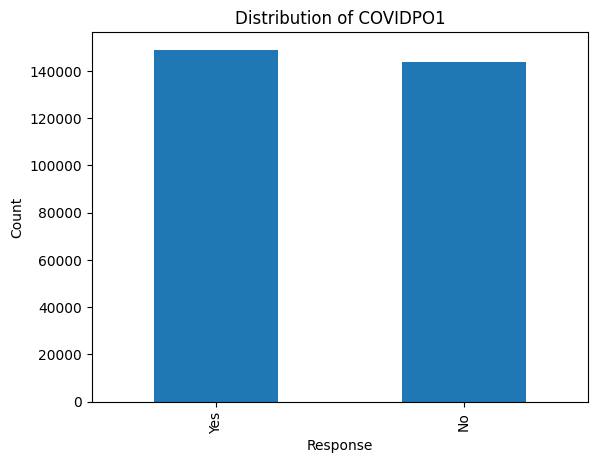


Value counts for GENHLTH:
GENHLTH
Very good    100540
Good          96688
Excellent     42846
Fair          40032
Poor          12667
Name: count, dtype: int64


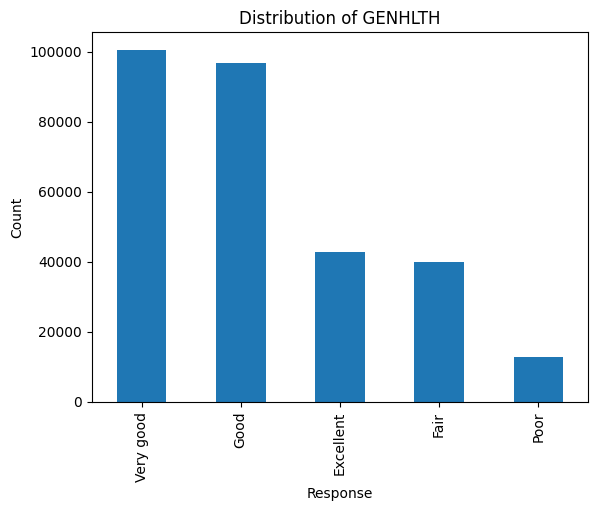


Value counts for EXERANY2:
EXERANY2
Yes    223709
No      69064
Name: count, dtype: int64


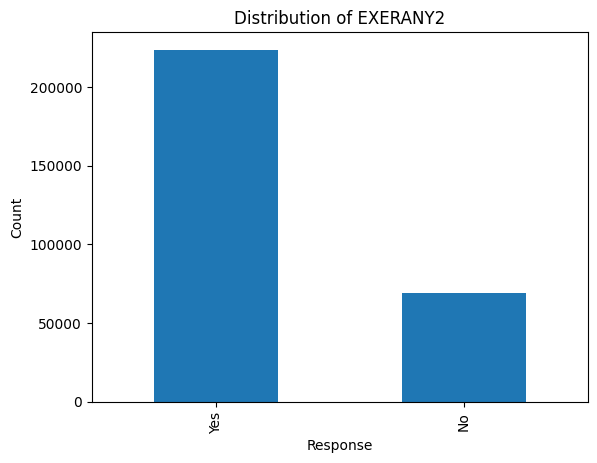


Value counts for TOLDHI3:
TOLDHI3
No     168946
Yes    123827
Name: count, dtype: int64


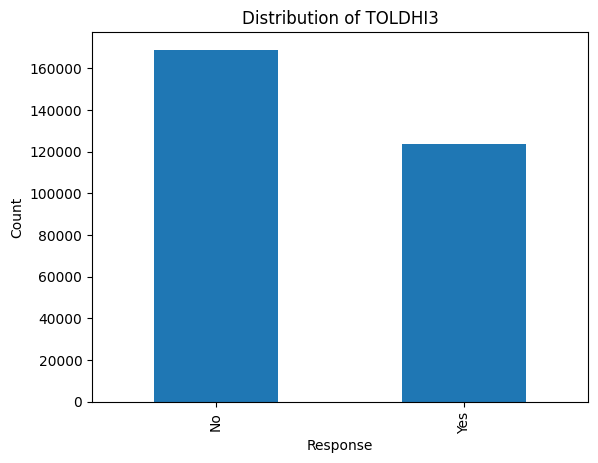

In [52]:
for col in feature_list:
    counts = df[col].value_counts(dropna=False)

    # Print counts for reference
    print(f"\nValue counts for {col}:\n{counts}")

    # Plot
    ax = counts.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Response')
    plt.ylabel('Count')
    title = plt.gca().get_title()
    filename = title.replace(" ", "_").replace("/", "-") + ".jpg"
    plt.savefig(filename, format='jpg', dpi=300)

    #plt.tight_layout()
    plt.show()

In [53]:
bool_feat = ['DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES',
              'DIFFALON', 'SMOKE100', 'FLUSHOT7', 'PNEUVAC4',
               'COVIDPO1', 'EXERANY2', 'TOLDHI3']
cat_feat=['GENHLTH', 'SEATBELT','ECIGNOW2','EDUCA']

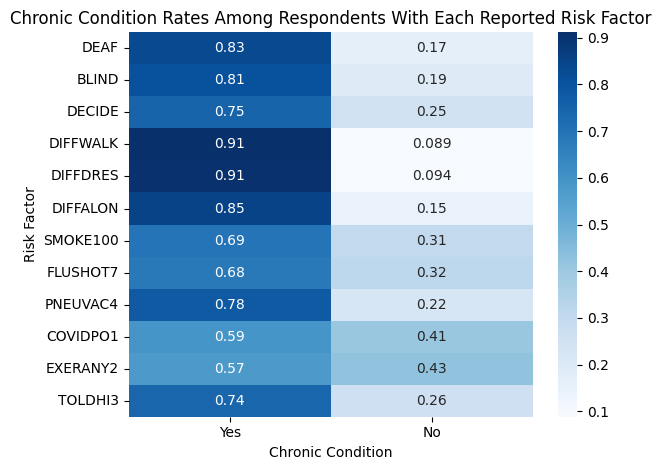

In [54]:
lifestyle_factors = bool_feat  
heat_data = {}

for col in lifestyle_factors:
    yes_rate = df[df[col] == 'Yes']['ALL_CHRONIC'].value_counts(normalize=True)
    heat_data[col] = yes_rate

heat_df = pd.DataFrame(heat_data).T.fillna(0)

sns.heatmap(heat_df, annot=True, cmap='Blues')
plt.title("Chronic Condition Rates Among Respondents With Each Reported Risk Factor")
plt.ylabel("Risk Factor")
plt.xlabel("Chronic Condition")
plt.tight_layout()
plt.savefig("chronic_condition_heatmap.jpg", format='jpg', dpi=300, bbox_inches='tight')

plt.show()


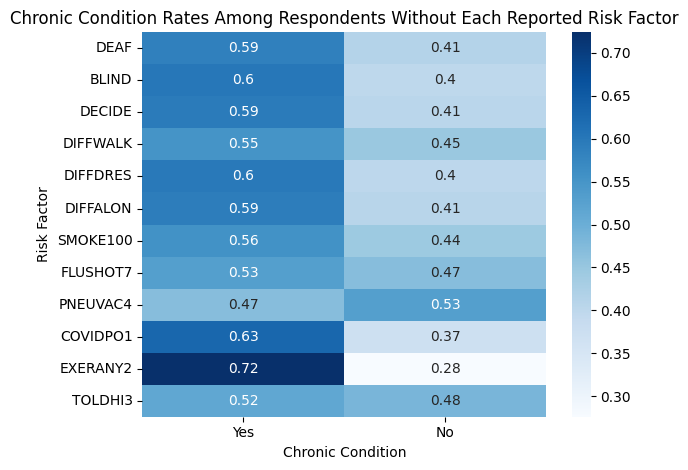

In [55]:
heat_data={}
for col in lifestyle_factors:
    yes_rate = df[df[col] == 'No']['ALL_CHRONIC'].value_counts(normalize=True)
    heat_data[col] = yes_rate

heat_df = pd.DataFrame(heat_data).T.fillna(0)
heat_df = heat_df[['Yes', 'No']]
sns.heatmap(heat_df, annot=True, cmap='Blues')
plt.title("Chronic Condition Rates Among Respondents Without Each Reported Risk Factor")
plt.ylabel("Risk Factor")
plt.xlabel("Chronic Condition")
plt.tight_layout()
plt.savefig("neg_chronic_condition_heatmap.jpg", format='jpg', dpi=300,bbox_inches='tight')
plt.show()

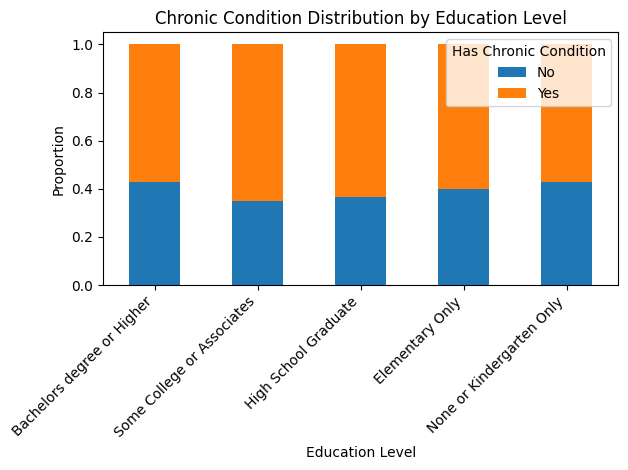

In [56]:
edu_chronic = df.groupby('EDUCA')['ALL_CHRONIC'].value_counts(normalize=True).unstack().fillna(0)
ordered_levels = ["Bachelors degree or Higher","Some College or Associates", "High School Graduate", "Elementary Only", "None or Kindergarten Only"]
edu_chronic = edu_chronic.loc[ordered_levels]

edu_chronic.plot(kind='bar', stacked=True)
plt.title('Chronic Condition Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Has Chronic Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("educationvschronic.jpg", format='jpg', dpi=300,bbox_inches='tight')
plt.show()

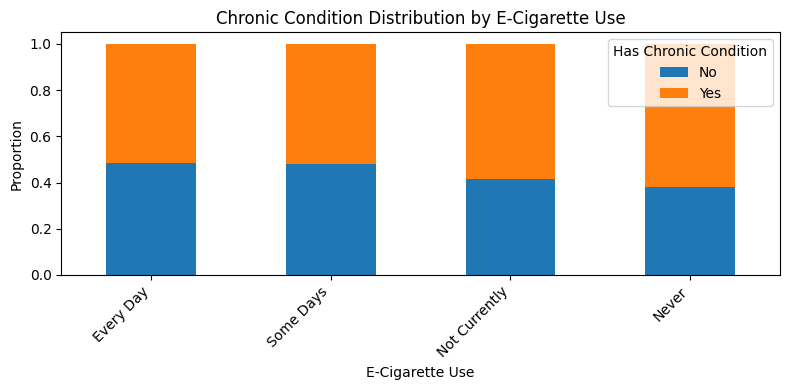

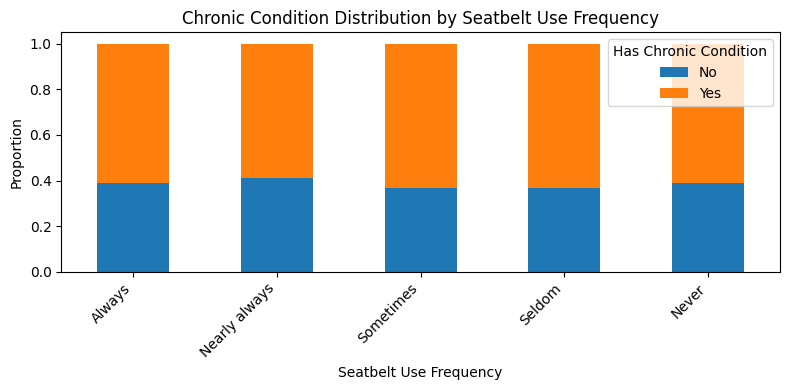

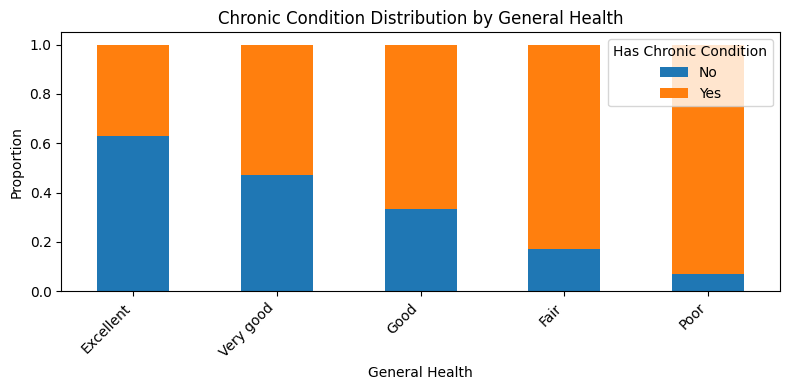

In [57]:


features = ['ECIGNOW2', 'SEATBELT', 'GENHLTH']

# Friendly labels for x-axis
x_labels = {
    'ECIGNOW2': 'E-Cigarette Use',
    'SEATBELT': 'Seatbelt Use Frequency',
    'GENHLTH': 'General Health'
}

#Fix the order of the labels
category_orders = {
    'ECIGNOW2': ['Every Day', 'Some Days', 'Not Currently', 'Never'],  
    'SEATBELT': ['Always', 'Nearly always', 'Sometimes', 'Seldom', 'Never'],
    'GENHLTH': ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
}

for col in features:

    ctab = pd.crosstab(df[col], df['ALL_CHRONIC'], normalize='index').fillna(0)
    if col in category_orders:
        ctab = ctab.reindex(category_orders[col])
    ax = ctab.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f'Chronic Condition Distribution by {x_labels[col]}')
    plt.xlabel(x_labels[col])
    plt.ylabel('Proportion')
    plt.legend(title='Has Chronic Condition')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    filename = f"chronic_vs_{col}.jpg".replace(" ", "_").lower()
    plt.savefig(filename, format='jpg', dpi=300, bbox_inches='tight')
    plt.show()


In [58]:
df.to_parquet(
    "rq3_filtered.parquet",
    engine="pyarrow",
    compression="BROTLI",
    compression_level=11,
    index=False
)

In [59]:

df_clustered = df.copy()
df_testval, df_train = train_test_split(
    df, test_size=0.70, random_state=42, stratify=df["ALL_CHRONIC"]
)


df_test, df_val = train_test_split(
    df_testval, test_size=0.50, random_state=42, stratify=df_testval["ALL_CHRONIC"]
)

print(f"Train shape: {df_train.shape}")
print(f"Validation shape: {df_val.shape}")
print(f"Test shape: {df_test.shape}")
df_train.head()

Train shape: (204942, 30)
Validation shape: (43916, 30)
Test shape: (43915, 30)


,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNC1,CHCOCNC1,CHCCOPD3,CHCKDNY2,HAVARTH4,DIABETE4,EDUCA,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,ECIGNOW2,FLUSHOT7,PNEUVAC4,SEATBELT,COVIDPO1,GENHLTH,EXERANY2,TOLDHI3,ALL_CHRONIC,ALL_CARDIAC,ALL_CANCER,ALL_PUL
181976,No,No,No,No,Yes,No,No,No,Yes,Yes,Bachelors degree or Higher,No,No,No,Yes,No,No,Yes,Not Currently,Yes,Yes,Always,No,Good,Yes,Yes,Yes,No,Yes,No
179360,No,No,No,No,No,No,No,No,No,No,Some College or Associates,No,No,No,No,No,No,No,Never,Yes,Yes,Always,Yes,Excellent,Yes,No,No,No,No,No
214044,No,No,No,No,No,No,No,No,Yes,Yes,Bachelors degree or Higher,No,Yes,No,Yes,No,No,No,Not Currently,Yes,Yes,Always,Yes,Fair,No,Yes,Yes,No,No,No
320149,No,No,No,No,No,No,No,No,Yes,No,Bachelors degree or Higher,No,No,No,No,No,No,Yes,Never,Yes,Yes,Always,No,Good,No,Yes,Yes,No,No,No
109533,No,No,No,No,No,No,No,No,No,No,Bachelors degree or Higher,No,No,No,No,No,No,No,Never,Yes,Yes,Always,Yes,Very good,Yes,No,No,No,No,No


In [ ]:
all_kresults = j_clustertuner.kmode_tune(df_test,df_val,feature_list,"ALL_CHRONIC")
card_kresults =j_clustertuner.kmode_tune(df_test,df_val,feature_list,"ALL_CARDIAC")
pul_kresults = j_clustertuner.kmode_tune(df_test,def_val,feature_list,"ALL_PUL")


Starting Baseline...
Validation Accuracy: 0.7177
Beginning Trials
Trial
2
Clustering training set...
Clustering on 16 features: ['EDUCA', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'ECIGNOW2', 'FLUSHOT7', 'PNEUVAC4', 'SEATBELT', 'COVIDPO1', 'GENHLTH', 'EXERANY2', 'TOLDHI3']
Clustering valadation set...
Clustering on 16 features: ['EDUCA', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'ECIGNOW2', 'FLUSHOT7', 'PNEUVAC4', 'SEATBELT', 'COVIDPO1', 'GENHLTH', 'EXERANY2', 'TOLDHI3']
Validation Accuracy: 0.7186
Trial
3
Clustering training set...
Clustering on 16 features: ['EDUCA', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'ECIGNOW2', 'FLUSHOT7', 'PNEUVAC4', 'SEATBELT', 'COVIDPO1', 'GENHLTH', 'EXERANY2', 'TOLDHI3']
Clustering valadation set...
Clustering on 16 features: ['EDUCA', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'ECIGNOW2', 'FLUSHOT7', 'PNEUVAC4', 'SEATBELT', 